In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
train_set_signals = pd.read_csv("../input/train/subj1_series1_data.csv")
train_set_signals.head()

,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,...,536,348,383,105,607,289,459,173,120,704
1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,...,529,327,369,78,613,248,409,141,83,737
2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,...,511,319,355,66,606,320,440,141,62,677
3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,...,521,336,356,71,568,339,437,139,58,592
4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,...,550,324,346,76,547,343,446,171,67,581


In [3]:
eeg_channels = train_set_signals.columns.drop('id')

In [4]:
train_set_labels = pd.read_csv("../input/train/subj1_series1_events.csv")
train_set_labels.head()

,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,subj1_series1_0,0,0,0,0,0,0
1,subj1_series1_1,0,0,0,0,0,0
2,subj1_series1_2,0,0,0,0,0,0
3,subj1_series1_3,0,0,0,0,0,0
4,subj1_series1_4,0,0,0,0,0,0


In [5]:
labels = train_set_labels.columns.drop('id')
print(labels)

Index(['HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff',
       'Replace', 'BothReleased'],
      dtype='object')


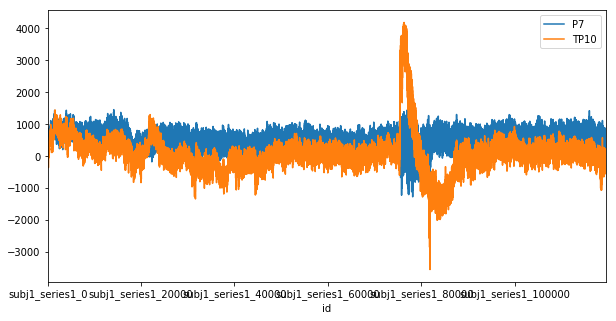

In [6]:
axis = plt.gca()
downSampleToShow = 1
train_set_signals[::downSampleToShow].plot(x="id", y="P7", ax=axis)
train_set_signals[::downSampleToShow].plot(x="id", y="TP10", ax=axis, figsize=(10,5))
plt.show()

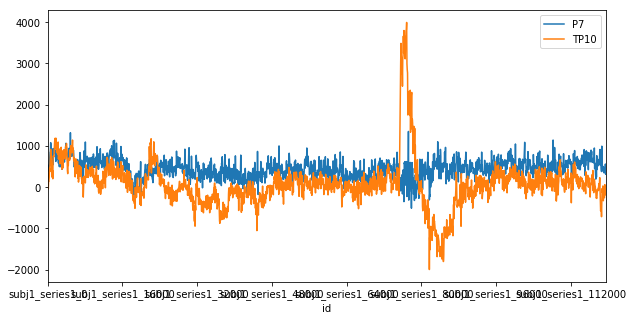

In [7]:
axis = plt.gca()
downSampleToShow = 64
train_set_signals[::downSampleToShow].plot(x="id", y="P7", ax=axis)
train_set_signals[::downSampleToShow].plot(x="id", y="TP10", ax=axis, figsize=(10,5))
plt.show()

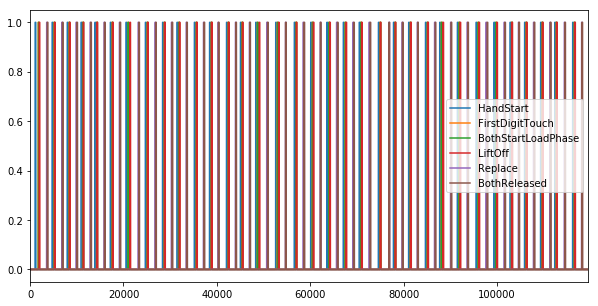

In [8]:
train_set_labels.plot(figsize=(10,5))
plt.show()

In [9]:
train_set_complete = pd.concat([train_set_signals,train_set_labels], axis=1)
train_set_complete.insert(0, "order", range(0, len(train_set_complete)))
train_set_complete.head()

,order,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,...,Oz,O2,PO10,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,subj1_series1_0,-31,363,211,121,211,15,717,279,...,173,120,704,subj1_series1_0,0,0,0,0,0,0
1,1,subj1_series1_1,-29,342,216,123,222,200,595,329,...,141,83,737,subj1_series1_1,0,0,0,0,0,0
2,2,subj1_series1_2,-172,278,105,93,222,511,471,280,...,141,62,677,subj1_series1_2,0,0,0,0,0,0
3,3,subj1_series1_3,-272,263,-52,99,208,511,428,261,...,139,58,592,subj1_series1_3,0,0,0,0,0,0
4,4,subj1_series1_4,-265,213,-67,99,155,380,476,353,...,171,67,581,subj1_series1_4,0,0,0,0,0,0


In [10]:
def highlight(indices,ax,color):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]-0.5, indices[i]+0.5, facecolor=color, edgecolor='none', alpha=.35)
        i+=1

HandStart = red
FirstDigitTouch = blue
BothStartLoadPhase = yellow
LiftOff = green
Replace = purple
BothReleased = black


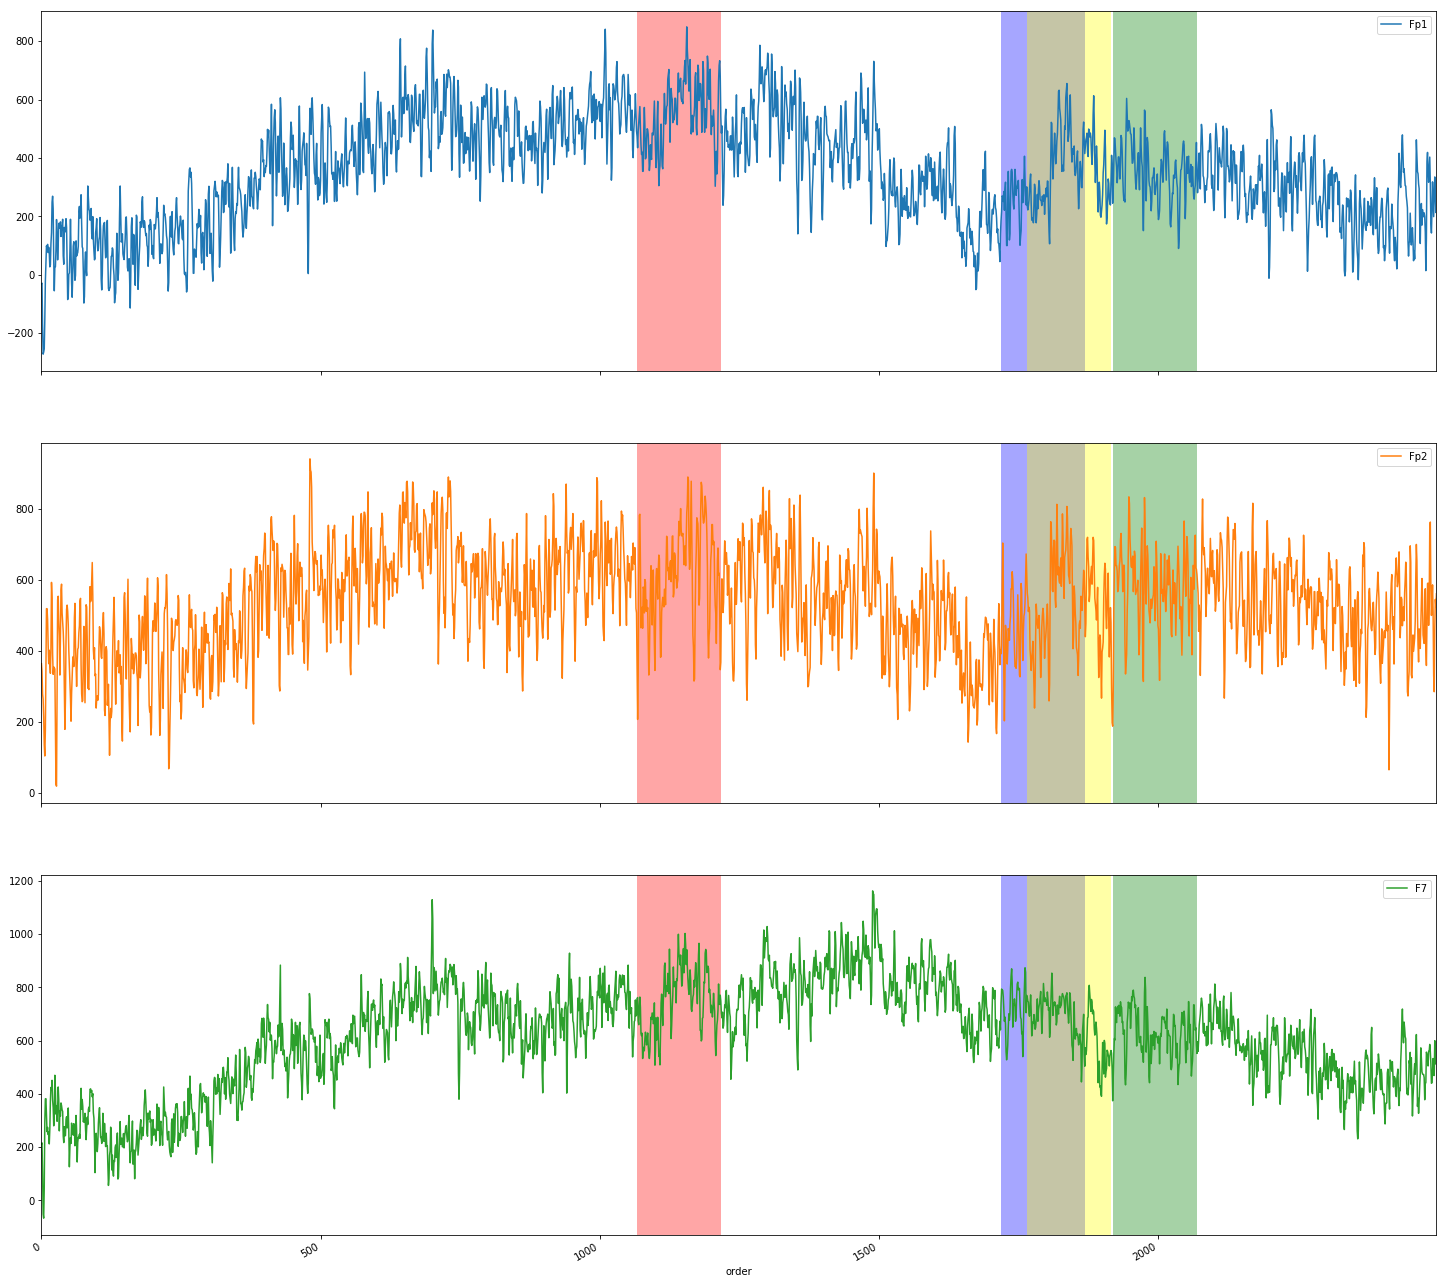

In [11]:
secondsToShow = 5
channelsToShow = 3
labelsToShow = 6

sample_set = train_set_complete[train_set_complete["order"] < secondsToShow*500].drop("id", axis=1).set_index("order") #sample rate is 500hz 
colors=["red","blue","yellow","green", "purple", "black"]
axes = sample_set.plot(y=eeg_channels[:channelsToShow],subplots=True, figsize=(25,25))
for i in range(0, len(labels)):
    print(labels[i], "=", colors[i])
    
for axis in axes:    
    colorindex = 0
    for label in labels[:labelsToShow]:
        highlight(sample_set[sample_set[label]==1].index, axis, colors[colorindex])        
        colorindex = colorindex + 1
plt.show()

**Loading and preparation methods:**

In [12]:
import math
from sklearn.preprocessing import StandardScaler

def load_train_data(subject, series):
    train_set_signals = pd.read_csv(f"../input/train/subj{subject}_series{series}_data.csv")
    train_set_labels = pd.read_csv(f"../input/train/subj{subject}_series{series}_events.csv")
    return train_set_signals, train_set_labels
    
def load_all_test_data():
    signals_dfs=[]
    for i in range(1,13):
        for j in range(9,11):            
            signals = pd.read_csv(f"../input/test/subj{i}_series{j}_data.csv")
            signals_dfs.append(signals)
    return pd.concat(signals_dfs)       

def load_test_data(subject):
    signals_dfs=[]    
    for i in range(9,11):            
        signals = pd.read_csv(f"../input/test/subj{subject}_series{i}_data.csv")
        signals_dfs.append(signals)
    return pd.concat(signals_dfs) 

def prepare_labels(data):    
    return data.drop("id", axis=1)
    
# used
# Standardize data by removing the mean and scaling to unit variance
def prepare_signals(data):
    data = data.drop("id", axis=1)
    columns = data.columns    
    scaler = StandardScaler() 
    data = np.asarray(data.astype(float))
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data, columns=columns)   
    return data

#def convert_np_array_to_pandas(data, columns):
#    data = pd.DataFrame(data, columns=columns)
#    return data
    
def load_train_data_prepared(subject, series):    
    signals, labels = load_train_data(subject,series)    
    return prepare_signals(signals), prepare_labels(labels)   

def split_data(data_to_split, percent):
    percenttotrainon = percent
    spliton = math.floor(float(len(data_to_split))*(percenttotrainon/float(100)))
    return data_to_split.iloc[:spliton], data_to_split[spliton:]   

def load_mass_data_2D(fromsubj = 1, tosubj = 12, fromSerie = 1, toSerie = 8, look_back = 1, downsample = 1): 
    # default downsample = 1 means no downsampling
    signals_dfs=[]
    labels_dfs=[]
    for j in range(fromsubj, tosubj+1): #we have 12 subjects
        for i in range(fromSerie, toSerie+1): #we have 8 series availible for each subject
            signals, labels = load_train_data_prepared(subject=j, series=i)
            signals_dfs.append(signals)
            labels_dfs.append(labels)        

    signals_complete=pd.concat(signals_dfs)
    labels_complete=pd.concat(labels_dfs)
    
    signalsDownsampled, labelsDownsampled = create_dataset(signals_complete.values[::downsample], labels_complete.values[::downsample], look_back)
    return signalsDownsampled, labelsDownsampled

#not done yet, todo or not todo?
def load_mass_data_2D_one_hot_encoding(fromsubj = 1, tosubj = 12, fromSerie = 1, toSerie = 8, look_back = 1, downsample = 1): 
    # default downsample = 1 means no downsampling
    signals_dfs=[]
    labels_dfs=[]
    for j in range(fromsubj, tosubj+1): #we have 12 subjects
        for i in range(fromSerie, toSerie+1): #we have 8 series availible for each subject
            signals, labels = load_train_data_prepared(subject=j, series=i)
            signals_dfs.append(signals)
            labels_dfs.append(labels)        

    signals_complete=pd.concat(signals_dfs)
    labels_complete=pd.concat(labels_dfs)
    
    dataX, dataY = create_dataset(signals_complete.values[::downsample], labels_complete.values[::downsample], look_back)
    
    # map each single label to pair 0 => (1,0), 1 => (0, 1)
    labels_one_hot_encode = np.zeros((len(dataY), 6, 2))
    
    for i in range(len(dataY)):
        for j in range(6):
            labels_one_hot_encode[i][j] = [1, 0] if (dataY[i][j] == 0) else [0, 1]
    
    return dataX, dataY


def load_mass_data_1D(fromsubj = 1, tosubj = 12, fromSerie = 1, toSerie = 8, downsample = 1): 
    # default downsample = 1 means no downsampling
    signals_dfs=[]
    labels_dfs=[]
    for j in range(fromsubj, tosubj+1): #we have 12 subjects
        for i in range(fromSerie, toSerie+1): #we have 8 series availible for each subject
            signals, labels = load_train_data_prepared(subject=j, series=i)
            signals_dfs.append(signals)
            labels_dfs.append(labels)        

    signals_complete=pd.concat(signals_dfs)
    labels_complete=pd.concat(labels_dfs)
    
    dataX, dataY = signals_complete.values[::downsample], labels_complete.values[::downsample]
    return dataX, dataY

def load_labels_header(): 
    signals, labels = load_train_data_prepared(1,1)
    return labels.columns

# used
# Loads all test series for one subject
# Returns test dataset, signal headers, ids
# look back: x previous rows to be assign to every data row
# serie: correct numbers for test-submit series are 9 and 10
def load_test_data_2D(subject, look_back, downsampling, serie):
    if(serie < 9 or 10 < serie):
        print(" *** Test series for sumbmission are only 9 and 10 *** ")
    signals_dfs=[]               
    signals = pd.read_csv(f"../input/test/subj{subject}_series{serie}_data.csv")
    signals_dfs.append(signals)
    signals_data = pd.concat(signals_dfs)
    ids = signals_data["id"]
    signals_data = prepare_signals(signals_data)
    dataX = create_test_dataset(signals_data.values[::downsampling], look_back)
    return dataX, signals_data.columns, ids

def create_dataset(dataset, labels, look_back=1):
    dataX = []
    dataY = labels[look_back:]
    
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), ])
    
    return np.array(dataX), np.array(dataY)

# used
# To every data row assigns previous x rows (look back)
def create_test_dataset(dataset, look_back=1):
    dataX = []
    
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), ])
    
    return np.array(dataX)

def load_mass_data_subject(subject, fromseries, toseries): #we have 12 subjects
    signals_dfs=[]
    labels_dfs=[]
    for i in range(fromseries,toseries+1): #we have 8 series availible for each subject        
        signals, labels = load_train_data_prepared(subject, series=i)
        signals_dfs.append(signals)
        labels_dfs.append(labels)        

    signals_complete=pd.concat(signals_dfs)
    labels_complete=pd.concat(labels_dfs)
    return signals_complete, labels_complete 


scaleOnes

In [13]:
def scaleOnes(signals, labels, neighborhood_length):
    appendSignals = []
    appendLabels = []
    sequence_of_ones_indexes = [] # sekvence jednicek co byly za sebou (jejich indexuu)
    list_of_sequences_of_ones_indexes = [] # list takovych sekvencii
    was_previous_label_one = False 
    # number of sequences of ones or zeroes
    number_of_zeros = 0
    number_of_ones = 0
    
    for j in range(0, len(signals)):
        if(1 in labels[j]):
            if(not was_previous_label_one):
                if(len(sequence_of_ones_indexes) != 0):
                    list_of_sequences_of_ones_indexes.append(sequence_of_ones_indexes)
                sequence_of_ones_indexes = []
                sequence_of_ones_indexes.append(j)
            if(was_previous_label_one):
                sequence_of_ones_indexes.append(j)
            was_previous_label_one = True
            number_of_ones = number_of_ones + 1
        else:
            was_previous_label_one = False
            number_of_zeros = number_of_zeros + 1
    list_of_sequences_of_ones_indexes.append(sequence_of_ones_indexes)
    
    scale_constant = 1
    scale = int((number_of_zeros // number_of_ones) * scale_constant) + 1
    print("scale: ", scale)
    for s in range(0, scale):
        for sequence in list_of_sequences_of_ones_indexes:
            #pridavam okoli pred jednickama               
            j = sequence[0]
            k = sequence[-1]
            for i in range(0, neighborhood_length):
                appendSignals.append(signals[j - (neighborhood_length - i)])
                appendLabels.append(labels[j - (neighborhood_length - i)])

            for i in sequence:
                appendSignals.append(signals[i])
                appendLabels.append(labels[i])

            #pridavam okoli za jednickama
            if(len(signals) > k + neighborhood_length):
                for i in range(0, neighborhood_length):
                    appendSignals.append(signals[k + i])
                    appendLabels.append(labels[k + i])

    signalsToAppend = np.array(appendSignals)
    labelsToAppend = np.array(appendLabels)

    signals = np.concatenate([signals, signalsToAppend])
    labels = np.concatenate([labels, labelsToAppend])
    return signals, labels

validate and round

In [14]:
def rd(x):
    if(x > 0.58):
        return 1
    return 0

def rd_basic(x):
    return round(x)

def validate(predictions, expected):
    # whole vector predicted correctly 
    succesfullyPredictedVector = 0
    #ones across all expected labels 
    totalOnes = 0
    #zeros across all expected labels 
    totalZeros = 0
    #ones correctly predicted across all labels
    succesfullyPredictedOnes = 0
    #ones correctly predicted across all labels
    succesfullyPredictedZeros = 0
    #ones expected, but not predicted - across all labels
    notPredictedOnes = 0
    totallyPredictedOnes = 1
#    onesPredictedSucc = 0
    
    # counts labels from expected data
    vectors_with_at_least_one = 0
    # counts labels from expected data
    multiple_ones_vectors = 0 

    for i in range(0, len(expected)): 
        predicted_vector = list(map(rd, predictions[i]))
        if(np.array_equal(predicted_vector,expected[i])):
            succesfullyPredictedVector+=1

        if 1 in expected[i]:
            vectors_with_at_least_one += 1
            ones_in_vector = 0
            #print("expected", expected[i], "predicted", predicted_vector)
            
            for j in range(0, len(expected[i])):
                if(expected[i][j] == 1):
                    totalOnes += 1
                    ones_in_vector +=1
                    if (predicted_vector[j] == expected[i][j]):
                        succesfullyPredictedOnes +=1
                    elif (expected[i][j] == 1):
                        notPredictedOnes +=1
                        
                else:
                    totalZeros += 1
                    if (predicted_vector[j] == expected[i][j]):
                        succesfullyPredictedZeros +=1
                        
            if(ones_in_vector > 1):
                multiple_ones_vectors += 1

        for k in range(0, len(predicted_vector)):
            if (predicted_vector[k] == 1):
                totallyPredictedOnes += 1  
                
    # Addition of +0.00001 to avoid division by zero
    print("total acc on vectors: ", succesfullyPredictedVector/(len(predictions)+0.00001))
    print("total acc on ones and zeros: ", (succesfullyPredictedOnes+succesfullyPredictedZeros)/(totalOnes+totalZeros+0.00001))
    print("1s predicted correctly (out of total ones expected): ", succesfullyPredictedOnes, "/",totalOnes, " = ", succesfullyPredictedOnes/(totalOnes+0.00001))
#    print("ones predicted but not expected (out of total ones): ", totallyPredictedOnes - onesPredictedSucc, "/", totalOnes)
#    print("1s predicted but not expected (in comparison with correctly predicted): ", totallyPredictedOnes - succesfullyPredictedOnes , "/", succesfullyPredictedOnes, " = ", (totallyPredictedOnes - succesfullyPredictedOnes)/(succesfullyPredictedOnes+0.00001))
    print("false positive ratio (false positives/actual negative events): ", totallyPredictedOnes - succesfullyPredictedOnes , "/", (len(expected)*6-totalOnes), " = ", (totallyPredictedOnes - succesfullyPredictedOnes)/((len(expected)*6-totalOnes)+0.00001))
#    false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events 
    print("vectors with multiple 1s: ", multiple_ones_vectors)
    print("total vectors with 1s: ", vectors_with_at_least_one)
    print("total vectors: ", len(expected))

validate_labels_separately

In [15]:
def validate_labels_separately(predictions, expected):
    # true positive = predicted 1 expected 1 
    # true negative = predicted 0 expected 0 
    # false positive = predicted 1 expected 0 
    # false negative = predicted 0 expected 1 
    
    oneTruePositive = [0, 0, 0, 0, 0, 0]
    zeroTrueNegative = [0, 0, 0, 0, 0, 0]
    oneFalsePositive = [0, 0, 0, 0, 0, 0]
    zeroFalseNegative = [0, 0, 0, 0, 0, 0]
    onesExpected = [0, 0, 0, 0, 0, 0]
    
    for i in range(0, len(expected)): 
        predictionVec = np.array([rd(xi) for xi in predictions[i]])
        for label in range(6):
            if(predictionVec[label] == rd(expected[i, label])):
                if(predictionVec[label] == 1):
                    oneTruePositive[label] += 1
                if(predictionVec[label] == 0):
                    zeroTrueNegative[label] += 1
            else:
                if(predictionVec[label] == 1):
                    oneFalsePositive[label] += 1
                if(predictionVec[label] == 0):
                    zeroFalseNegative[label] += 1
            if(expected[i][label] == 1):
                onesExpected[label] += 1
            
    # Addition of +0.00001 to avoid division by zero
    for label in range(6):
        print("             ")
        print("label ", label)
        print("total acc: ", (oneTruePositive[label] + zeroTrueNegative[label])/(len(predictions)))
        print("true positive = predicted 1 expected 1: ", oneTruePositive[label], " / ", (onesExpected[label]), " = ", oneTruePositive[label]/(onesExpected[label]), "(out of ones)")
        print("true negative = predicted 0 expected 0: ", zeroTrueNegative[label], "/", (len(predictions)-onesExpected[label]), " = ", zeroTrueNegative[label]/(len(predictions)), "(out of zeros)")
        print("false positive = predicted 1 expected 0: ", oneFalsePositive[label], "/", (len(predictions)), " = ", oneFalsePositive[label]/(len(predictions)))
        print("false negative = predicted 0 expected 1: ", zeroFalseNegative[label], "/", (len(predictions)), " = ", zeroFalseNegative[label]/(len(predictions)))
    print("             ")
    print("Total summary")
    print("total acc: ", (np.sum(oneTruePositive) + np.sum(zeroTrueNegative))/(len(predictions)*6))
    print("true positive = predicted 1 expected 1: ", np.sum(oneTruePositive)/(np.sum(onesExpected)))
    print("true negative = predicted 0 expected 0: ", np.sum(zeroTrueNegative)/(len(predictions)*6-np.sum(onesExpected)))
    print("false positive = predicted 1 expected 0: ", np.sum(oneFalsePositive)/(len(predictions)*6))
    print("false negative = predicted 0 expected 1: ", np.sum(zeroFalseNegative)/(len(predictions)*6))

In [16]:
#https://sccn.ucsd.edu/wiki/Introduction_To_Modern_Brain-Computer_Interface_Design
#https://hal.inria.fr/hal-01055103/file/lotte_EEGSignalProcessing.pdf

**CNN**

**Predict**

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

def predict_single_label_mode(my_test_signals, models):
    for i in range(len(models)):
        result = models[i].predict(my_test_signals)
        if(i == 0):
            final_result = result
        else:
            final_result = np.append(final_result, result, axis = 0)
    return final_result

        
# Returns np.array, the prediction on given signals
def predict_cnn(test_signals, models, mode):
    nlenghtTest, nrowsTest, ncolsTest = test_signals.shape
    test_signals_reshaped = test_signals.reshape(nlenghtTest, nrowsTest, ncolsTest, 1)
    if(mode == Mode.signle_label_mode):
        for i in range(6):
            result = models[i].predict(test_signals_reshaped)
            if(i == 0):
                final_result = result
            else:
                print(final_result.shape)
                final_result = np.append(final_result, result, axis = 1)
        return final_result
    elif(mode == Mode.seven_labels):
        for i in range(6):
            result = models[i].predict(test_signals_reshaped)
            result = np.delete(result, 0, axis = 1)
            if(i == 0):
                final_result = result
            else:
                final_result = np.append(final_result, result, axis = 1)
        return final_result

    else:
        result = models.predict(test_signals_reshaped)
        return result

**Highlight and Visualization**

In [18]:
def highlight(indices,ax,color):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]-0.5, indices[i]+0.5, facecolor=color, edgecolor='none', alpha=.4)
        i+=1

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def vizualize_predictions(signals, predictions, expected, labelName, limit=2000): 
    #0-31
    signalIndex = 10
    
    #TODO relevant only for multilabel predictions, else is always 0
    labelIndex = 0
                
    signals = pd.DataFrame(data=np.array(signals))
    axis = signals[signals.columns[signalIndex]].iloc[0:limit].plot(figsize=(20,4))  
        
    expected = pd.DataFrame(data = expected)    
    predictions = pd.DataFrame(data = np.around(predictions))
    
    expectedCropped = expected.iloc[0:limit,]
    predictionsCropped = predictions.iloc[0:limit,]
    
    highlight(expectedCropped[expectedCropped.iloc[:,labelIndex]==1].index, axis, "red")
    highlight(predictionsCropped[predictionsCropped.iloc[:,labelIndex]==1].index, axis, "black")
    
    red_patch = mpatches.Patch(color='red', label='Expected event')
    black_patch = mpatches.Patch(color='black', label='Predicted event')
    plt.legend(handles=[red_patch, black_patch])

    plt.title(labelName)
    plt.show()

**Upsampling result for submision**

*upsample_result(..)*

In [20]:
def upsample_result(results, multiplication_coefficient):
    shape = results.shape
    upsampled_result = np.zeros((shape[0] * multiplication_coefficient, shape[1]))
    for i in range(len(results)):
        for j in range(multiplication_coefficient):
            upsampled_result[i * multiplication_coefficient + j] = results[i]
    return upsampled_result

**Training**

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import gc
from enum import Enum

# trains CNN with given train data
# Returns void
# trainon_signals: training data
# trainon_labels: labels for training data
# models: a list of CNN models (if signle_label_mode is True), single CNN model (if signle_label_mode is False)
# epochs: number of training epochs for each model
# signle_label_mode: boolean decides if to train on each label separately or on all of them at once (as a single vector of length 6)
def train_cnn(trainon_signals, trainon_labels, models, epochs, mode, my_verbose):
    data = trainon_signals
    labels = trainon_labels
    if(my_verbose):
        verbose=1
    else:
        verbose=0
    
    if(mode == Mode.signle_label_mode):
        nlenghtData, nrowsData, ncolsData = data.shape
        data_single_label = data.reshape(nlenghtData, nrowsData, ncolsData, 1)
        for i in range(6):
            if(my_verbose):
                print("Training model ", i)
            labels_single_label = np.zeros((len(labels), 1))
            for k in range(len(labels)):
                labels_single_label[k][0] = labels[k][i]
            models[i].fit(data_single_label, labels_single_label, epochs=epochs, batch_size=128, verbose=int(my_verbose))          
    elif(mode == Mode.seven_labels):
        nlenghtData, nrowsData, ncolsData = data.shape
        data_single_label = data.reshape(nlenghtData, nrowsData, ncolsData, 1)
        for i in range(6):
            if(my_verbose):
                print("Training model ", i)
            labels_single_label = np.zeros((len(labels), 2))
            for k in range(len(labels)):
                labels_single_label[k][0] = labels[k][i]
            models[i].fit(data_single_label, labels_single_label, epochs=epochs, batch_size=128, verbose=int(my_verbose))
    elif(mode == Mode.standard):
        nlenghtData, nrowsData, ncolsData = data.shape
        data = data.reshape(nlenghtData, nrowsData, ncolsData, 1)
        # in case of signle_label_mode == False, models is not a list but a single model
        models.fit(data, labels, epochs=epochs, batch_size=128, verbose=int(my_verbose))
        
# used
# popis....
# look_back: history dimension of every row, number of previous rows appended before every data row
# activation: function for every layer except last one
# last_layer_activation
# loss: function
# output_length: size of the last layer
def cnn_model(look_back, activation, last_layer_activation, loss, output_length):
    model = models.Sequential()
    # 32 of eeg channels = input_shape == len(train_signals.columns)
    channels = 32
    # model.add(layers.Dropout(rate=0.1))       
    model.add(layers.Conv2D(filters=192, kernel_size=(3,1), activation='relu', input_shape=(look_back, channels, 1)))
    model.add(layers.MaxPooling2D((2,1)))
    # filters=512
    # model.add(layers.Conv2D(128, (3,1), activation='relu'))
    # model.add(layers.MaxPooling2D((2,1)))

    # model.add(layers.Dropout(rate=0.5))
    model.add(layers.Flatten())
    # model.add(layers.Dense(512, activation='relu'))
    # https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax
    #model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    # model.summary()
    
    # categorical cross entropy
    # optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
    model.compile(optimizer='adam',
                  loss=tf.losses.softmax_cross_entropy,
                  #metrics=['cosine_similarity'])
                  metrics=["accuracy"])
    # metrics=["categorical_accuracy"])
    return model

def printSubjectSerie(subject, serie):
    if(True):
        print("                                                                             ")
        print("subject: " + str(subject) + "  |  serie: " + str(serie))



**cnn_submission_train_on_each_subject_separately**

In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import gc
from enum import Enum
    
# scale_ones: multiplier for scaling of ones with neighborhood; no multiplication if False
def cnn_submission_train_on_each_subject_separately(trainEpochs, downsampling, look_back, activation, last_layer_activation, loss, scale_ones, mode, my_verbose, single_label_statistics, total_statistics):
    results_ids=[]
    results = np.zeros((1, 6))
    # could be better bigger? this is just test value
    # scaling_neighborhood_length = look_back + 2
    scaling_neighborhood_length = 1
    number_of_testing_serie = 8
    start_subj = 1
    # there is 13 subjects, default end_subj = 13
    end_subj = 13
    start_serie = 1
    # training series: 1 to 7, testing serie: 8 
    # for internal testing we use: last_serie = 9 - 1
    last_serie = 9
    test_signals = [None] * 2
    test_header = [None] * 2
    test_ids = [None] * 2
    
    submit = True
    test_on_other_subjs = False
    # we want only total_statistics, while testing on other subjects
    single_label_statistics = not test_on_other_subjs and False


    for i in range(start_subj, end_subj): # subjects
        test_signals[0], test_header[0], test_ids[0] = load_test_data_2D(i, look_back, downsampling, 9)
        test_signals[1], test_header[1], test_ids[1] = load_test_data_2D(i, look_back, downsampling, 10)

        # 6 labels standard START ----------------------------------------------------------------------------------------------
        if(mode == Mode.standard):
            print(Mode.standard)
            output_length = 6
            models = cnn_model(look_back, activation, last_layer_activation, loss, output_length)
            for serie in range(start_serie, 9 - 1): # series for 1 subject; serie 8 is for testing
                printSubjectSerie(i, serie)
                train_signals, train_labels = load_mass_data_2D(i,i,serie,serie,look_back,downsampling)
                if(scale_ones == True):
                    train_signals, train_labels = scaleOnes(train_signals, train_labels, scaling_neighborhood_length)
                train_cnn(train_signals, train_labels, models, trainEpochs, mode, my_verbose)            
                del train_signals
                del train_labels
                gc.collect()
        else:
            print("no other then standard mode supported here")
            exit()
        # 6 labels standard END  ----------------------------------------------------------------------------------------------
        
        if(submit): #skip fitting
            #fit START
            for submission_serie_number in range(2):
                print(submission_serie_number)
                result = predict_cnn(test_signals[submission_serie_number], models, mode)
                print("*** predicted ***")
                # padding
                result = np.concatenate((np.zeros((look_back, 6)), result), axis=0)
                # upsample
                # multiplication_coefficient === downsampling
                result = upsample_result(result, downsampling)
                # append single result to all results
                results = np.vstack((results, result))
                results_ids.append(test_ids[submission_serie_number])
            # fit END
        
        # My testing START
        if(test_on_other_subjs):
            # there is 13 subjects
            test_on_subj_start = 1
            test_on_subj_end = 13
        else:
            test_on_subj_start = i
            test_on_subj_end = i+1
            
        for test_subj in range(test_on_subj_start, test_on_subj_end):
            print("____________________________________")
            print("Test on subject " + str(test_subj))
            my_test_signals, my_test_labels = load_mass_data_2D(test_subj,test_subj,number_of_testing_serie,number_of_testing_serie,look_back,downsampling)

            my_test_predictions = predict_cnn(my_test_signals, models, mode)
            if(total_statistics):
                validate(expected= my_test_labels, predictions= my_test_predictions)
            if(single_label_statistics):
                validate_labels_separately(expected= my_test_labels, predictions= my_test_predictions)

        # my_test_signals_1D, my_test_labels = load_mass_data_1D(i,i,number_of_testing_serie,number_of_testing_serie,downsampling)
        # vizualize predicstions
        # for i in range(6):
            # labelName= "validation set: label " + str(i)
            # vizualize_predictions(signals = my_test_signals_1D, predictions = my_test_predictions[:, i], expected = my_test_labels[:, i], labelName=labelName, limit=2000)
        # My testing END
        
    if(submit):
        # upsample and submit START
        # unset variables
        del models
        del result
        gc.collect()

        submission_name = "v-cnn-submission.csv"
        header = load_labels_header()
        #print(header.values)
        #print(results)
        #print(results_ids)

        # fix uneven data len START
        # delete first default-dummy line that was added at creation of results
        results = np.delete(results, 0, axis=0)
        if(False): # debug print
            print("before submission")
            # print(results_ids)
            # print("______________________________")
            # print(type(results_ids))
            # print("______________________________")
            print("len(results_ids[0]) " + str(len(results_ids[0])))
            print("len(results_ids[1]) " + str(len(results_ids[1])))
            print("______________________________")
            print("results.shape[0] " + str(results.shape[0]))
            print("______________________________")
        diff = results.shape[0]
        for ids_column in range (len(results_ids)):
            diff -= len(results_ids[ids_column])
        print("______________________________")
        print("difference in expected submission len and my: " + str(diff))
        if(True and diff > 0):
            for delete_index in range(diff):
                results = np.delete(results, len(results)-1, axis=0)
        # fix uneven data len END
        submission = pd.DataFrame(columns=header.values, data=results, index=np.concatenate(results_ids))

        #______________________________________________________TODO don't round the submission?
        submission.to_csv(submission_name,index_label="id",float_format='%.3f')
        # upsample and submit END
    print("---   Done!   ---")



**cnn_submission_train_on_all_subjects**

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import gc
from enum import Enum
    
# scale_ones: multiplier for scaling of ones with neighborhood; no multiplication if False
def cnn_submission_train_on_all_subjects(trainEpochs, downsampling, look_back, activation, last_layer_activation, loss, scale_ones, mode, my_verbose, single_label_statistics, total_statistics):
    results_ids=[]
    results = np.zeros((1, 6))
    scaling_neighborhood_length = 1
    number_of_testing_serie = 8
    start_subj = 1
    # there is 13 subjects, default end_subj = 13
    end_subj = 13
    start_serie = 1
    # training series: 1 to 7, testing serie: 8 
    # last_serie = 9 - 1
    last_serie = 8
    test_signals = [None] * 2
    test_header = [None] * 2
    test_ids = [None] * 2
    
    submit = True
    
    if(mode == Mode.standard):
        print(Mode.standard)
        output_length = 6
        models = cnn_model(look_back, activation, last_layer_activation, loss, output_length)
    else:
        print("invalid mode; only valid mode is " + Mode.standard)
        exit()
    
    for i in range(start_subj, end_subj): # subjects
        test_signals[0], test_header[0], test_ids[0] = load_test_data_2D(i, look_back, downsampling, 9)
        test_signals[1], test_header[1], test_ids[1] = load_test_data_2D(i, look_back, downsampling, 10)
        # 6 labels standard START ----------------------------------------------------------------------------------------------
        for serie in range(start_serie, last_serie): # series for 1 subject; serie 8 is for testing
            printSubjectSerie(i, serie)
            train_signals, train_labels = load_mass_data_2D(i,i,serie,serie,look_back,downsampling)
            if(scale_ones == True):
                train_signals, train_labels = scaleOnes(train_signals, train_labels, scaling_neighborhood_length)
            train_cnn(train_signals, train_labels, models, trainEpochs, mode, my_verbose)            
            del train_signals
            del train_labels
            gc.collect()
        # 6 labels standard END  ----------------------------------------------------------------------------------------------

    if(submit):
        # fit START
        for submission_serie_number in range(2):
            print("subject " + str(i) + " : serie " + str(submission_serie_number))
            result = predict_cnn(test_signals[submission_serie_number], models, mode)
            print("*** predicted ***")
            # padding
            result = np.concatenate((np.zeros((look_back, 6)), result), axis=0)
            # upsample
            # multiplication_coefficient === downsampling
            result = upsample_result(result, downsampling)
            # append single result to all results
            results = np.vstack((results, result))
            results_ids.append(test_ids[submission_serie_number])
        # fit END

    # My testing START
    my_test_signals, my_test_labels = load_mass_data_2D(start_subj,end_subj-1,number_of_testing_serie,number_of_testing_serie,look_back,downsampling)

    my_test_predictions = predict_cnn(my_test_signals, models, mode)
    if(total_statistics):
        validate(expected= my_test_labels, predictions= my_test_predictions)
    if(single_label_statistics):
        validate_labels_separately(expected= my_test_labels, predictions= my_test_predictions)

#    my_test_signals_1D, my_test_labels = load_mass_data_1D(i,i,number_of_testing_serie,number_of_testing_serie,downsampling)
    # My testing END
    if(submit):
        # upsample and submit START
        # unset variables
        del result
        gc.collect()

        submission_name = "v-cnn-submission.csv"
        header = load_labels_header()

        # fix uneven data len START
        # delete first default-dummy line that was added at creation of results
        results = np.delete(results, 0, axis=0)
        if(False): # debug print
            print("before submission")
            # print(results_ids)
            # print("______________________________")
            # print(type(results_ids))
            # print("______________________________")
            print("len(results_ids[0]) " + str(len(results_ids[0])))
            print("len(results_ids[1]) " + str(len(results_ids[1])))
            print("______________________________")
            print("results.shape[0] " + str(results.shape[0]))
            print("______________________________")
        diff = results.shape[0]
        for ids_column in range (len(results_ids)):
            diff -= len(results_ids[ids_column])
        print("______________________________")
        print("difference in expected submission len and my: " + str(diff))
        if(True and diff > 0):
            for delete_index in range(diff):
                results = np.delete(results, len(results)-1, axis=0)
        # fix uneven data len END
        submission = pd.DataFrame(columns=header.values, data=results, index=np.concatenate(results_ids))

        #______________________________________________________TODO don't round the submission?
        submission.to_csv(submission_name,index_label="id",float_format='%.3f')
        # upsample and submit END
    print("---   Done!   ---")



In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import gc
from enum import Enum

class Mode(Enum):
    # six labels standard
    standard = 1
    # trains 6 separate models, each for one single label
    signle_label_mode = 2
    # trains 6 models, f.e. for model/label-3 transforms labels as  001000 -> 10, 000001 -> 01, 000000 -> 01
    seven_labels = 4
    
class TrainOn(Enum):
    each_subject_separately = 1
    all_subjects = 2

mode = Mode.standard
train_on = TrainOn.each_subject_separately
trainEpochs = 12
# downsampling = 1 means no downsampling
downsampling = 20
look_back = 10
activation = tf.keras.activations.relu
#last_layer_activation = tf.keras.activations.sigmoid
#loss = tf.losses.mean_squared_error
last_layer_activation = tf.keras.activations.softmax
loss = tf.losses.softmax_cross_entropy
# scale_ones: aktualne skaluju jednicky jedna ku jedne s nulama
# boolean on/off
scale_ones = False 
my_verbose = False
single_label_statistics = True
total_statistics = True

if(train_on == TrainOn.each_subject_separately):
    cnn_submission_train_on_each_subject_separately(trainEpochs, downsampling, look_back, activation, last_layer_activation, loss, scale_ones, mode, my_verbose, single_label_statistics, total_statistics)

if(train_on == TrainOn.all_subjects):
    cnn_submission_train_on_all_subjects(trainEpochs, downsampling, look_back, activation, last_layer_activation, loss, scale_ones, mode, my_verbose, single_label_statistics, total_statistics)

#model = cnn_model()
#model.summary()

Mode.standard
                                                                             
subject: 1  |  serie: 1
                                                                             
subject: 1  |  serie: 2
                                                                             
subject: 1  |  serie: 3
                                                                             
subject: 1  |  serie: 4
                                                                             
subject: 1  |  serie: 5
                                                                             
subject: 1  |  serie: 6
                                                                             
subject: 1  |  serie: 7
0
*** predicted ***
1
*** predicted ***
____________________________________
Test on subject 1
total acc on vectors:  0.46662113630421526
total acc on ones and zeros:  0.8437408372269997
1s predicted correctly (out of total ones expected):  646 / 1524  =  0.42388451165430